# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
import numpy as np

# Training, validation and testing data
# downloaded from https://s3.amazonaws.com/video.udacity-data.com/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

training_file = "dataset/train.p"
validation_file= "dataset/valid.p"
testing_file = "dataset/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# Number of training examples
n_train = len(y_train)

# Number of validation examples
n_validation = len(y_valid)

# Number of testing examples.
n_test = len(y_test)

# What's the shape of an traffic sign image?
image_shape = np.array(X_train[0]).shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(np.append(np.append(y_test,y_valid),y_train)))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
import csv
signs = []
with open('signnames.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    
    for row in readCSV:
        signs.append(row[1])
    signs.pop(0)
    
def plot_figures(figures, nrows = 1, ncols=1, labels=None):
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 15))
    axs = axs.ravel()
    for index, title in zip(range(len(figures)), figures):
        axs[index].imshow(figures[title], plt.gray())
        if(labels != None):
           axs[index].set_title(labels[index])
        else:
            axs[index].set_title(title)
            
        axs[index].set_axis_off()
        
    plt.tight_layout()

Number of samples per class min, 180  mean  809 max 2010
Balanced training examples 7740


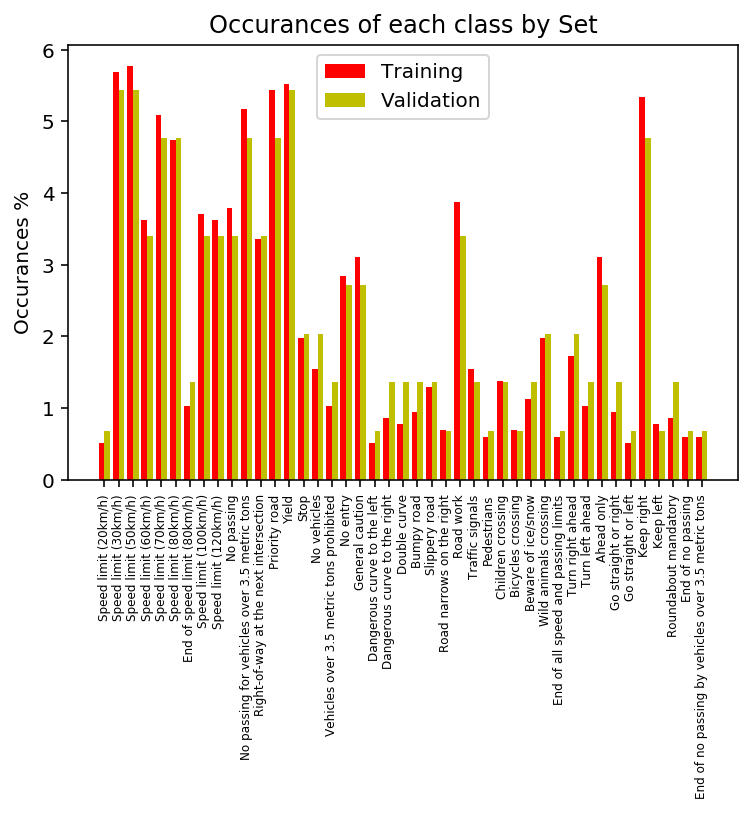

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
from scipy import ndimage
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
plt.rcParams['figure.dpi']=2*plt.rcParams['figure.dpi']

#calculate a histogram for occurances of each class (training and validation data)
y_train_u,y_train_unique_inverse, y_train_counts = np.unique(y_train, return_inverse =True, return_counts =True)
y_valid_u,y_valid_unique_inverse, y_valid_counts = np.unique(y_valid, return_inverse =True, return_counts =True)

min_train_count = min(y_train_counts)
med_train_count = int(np.mean(y_train_counts))
max_train_count = int(np.max(y_train_counts))

print("Number of samples per class min,",min_train_count," mean ",med_train_count,"max",max_train_count)
ind = np.arange(n_classes)


#collect a random set of indices to include same number occurances from each class (training dataset)
#indexing_arr will contain a balances set of signs

indexing_arr= np.array([])
for num in ind:  
    indexing_arr = np.concatenate(((indexing_arr),(np.random.choice(np.hstack(np.where(y_train==num)),min_train_count,False))))

indexing_arr_int = indexing_arr.astype(int)
print("Balanced training examples", len(indexing_arr))

width = 0.4

fig, ax = plt.subplots()
rects1 = ax.bar(ind, y_train_counts/(len(y_train)/100) ,width, color='r')
rects2 = ax.bar(ind+width, y_valid_counts/(len(y_valid)/100),width, color='y')

ax.set_ylabel('Occurances %')
ax.set_title('Occurances of each class by Set')
ax.set_xticks(ind + width/2)
ax.set_xticklabels(signs,rotation=90, fontsize=6)
ax.legend((rects1[0], rects2[0]), ('Training', 'Validation'))

plt.show()

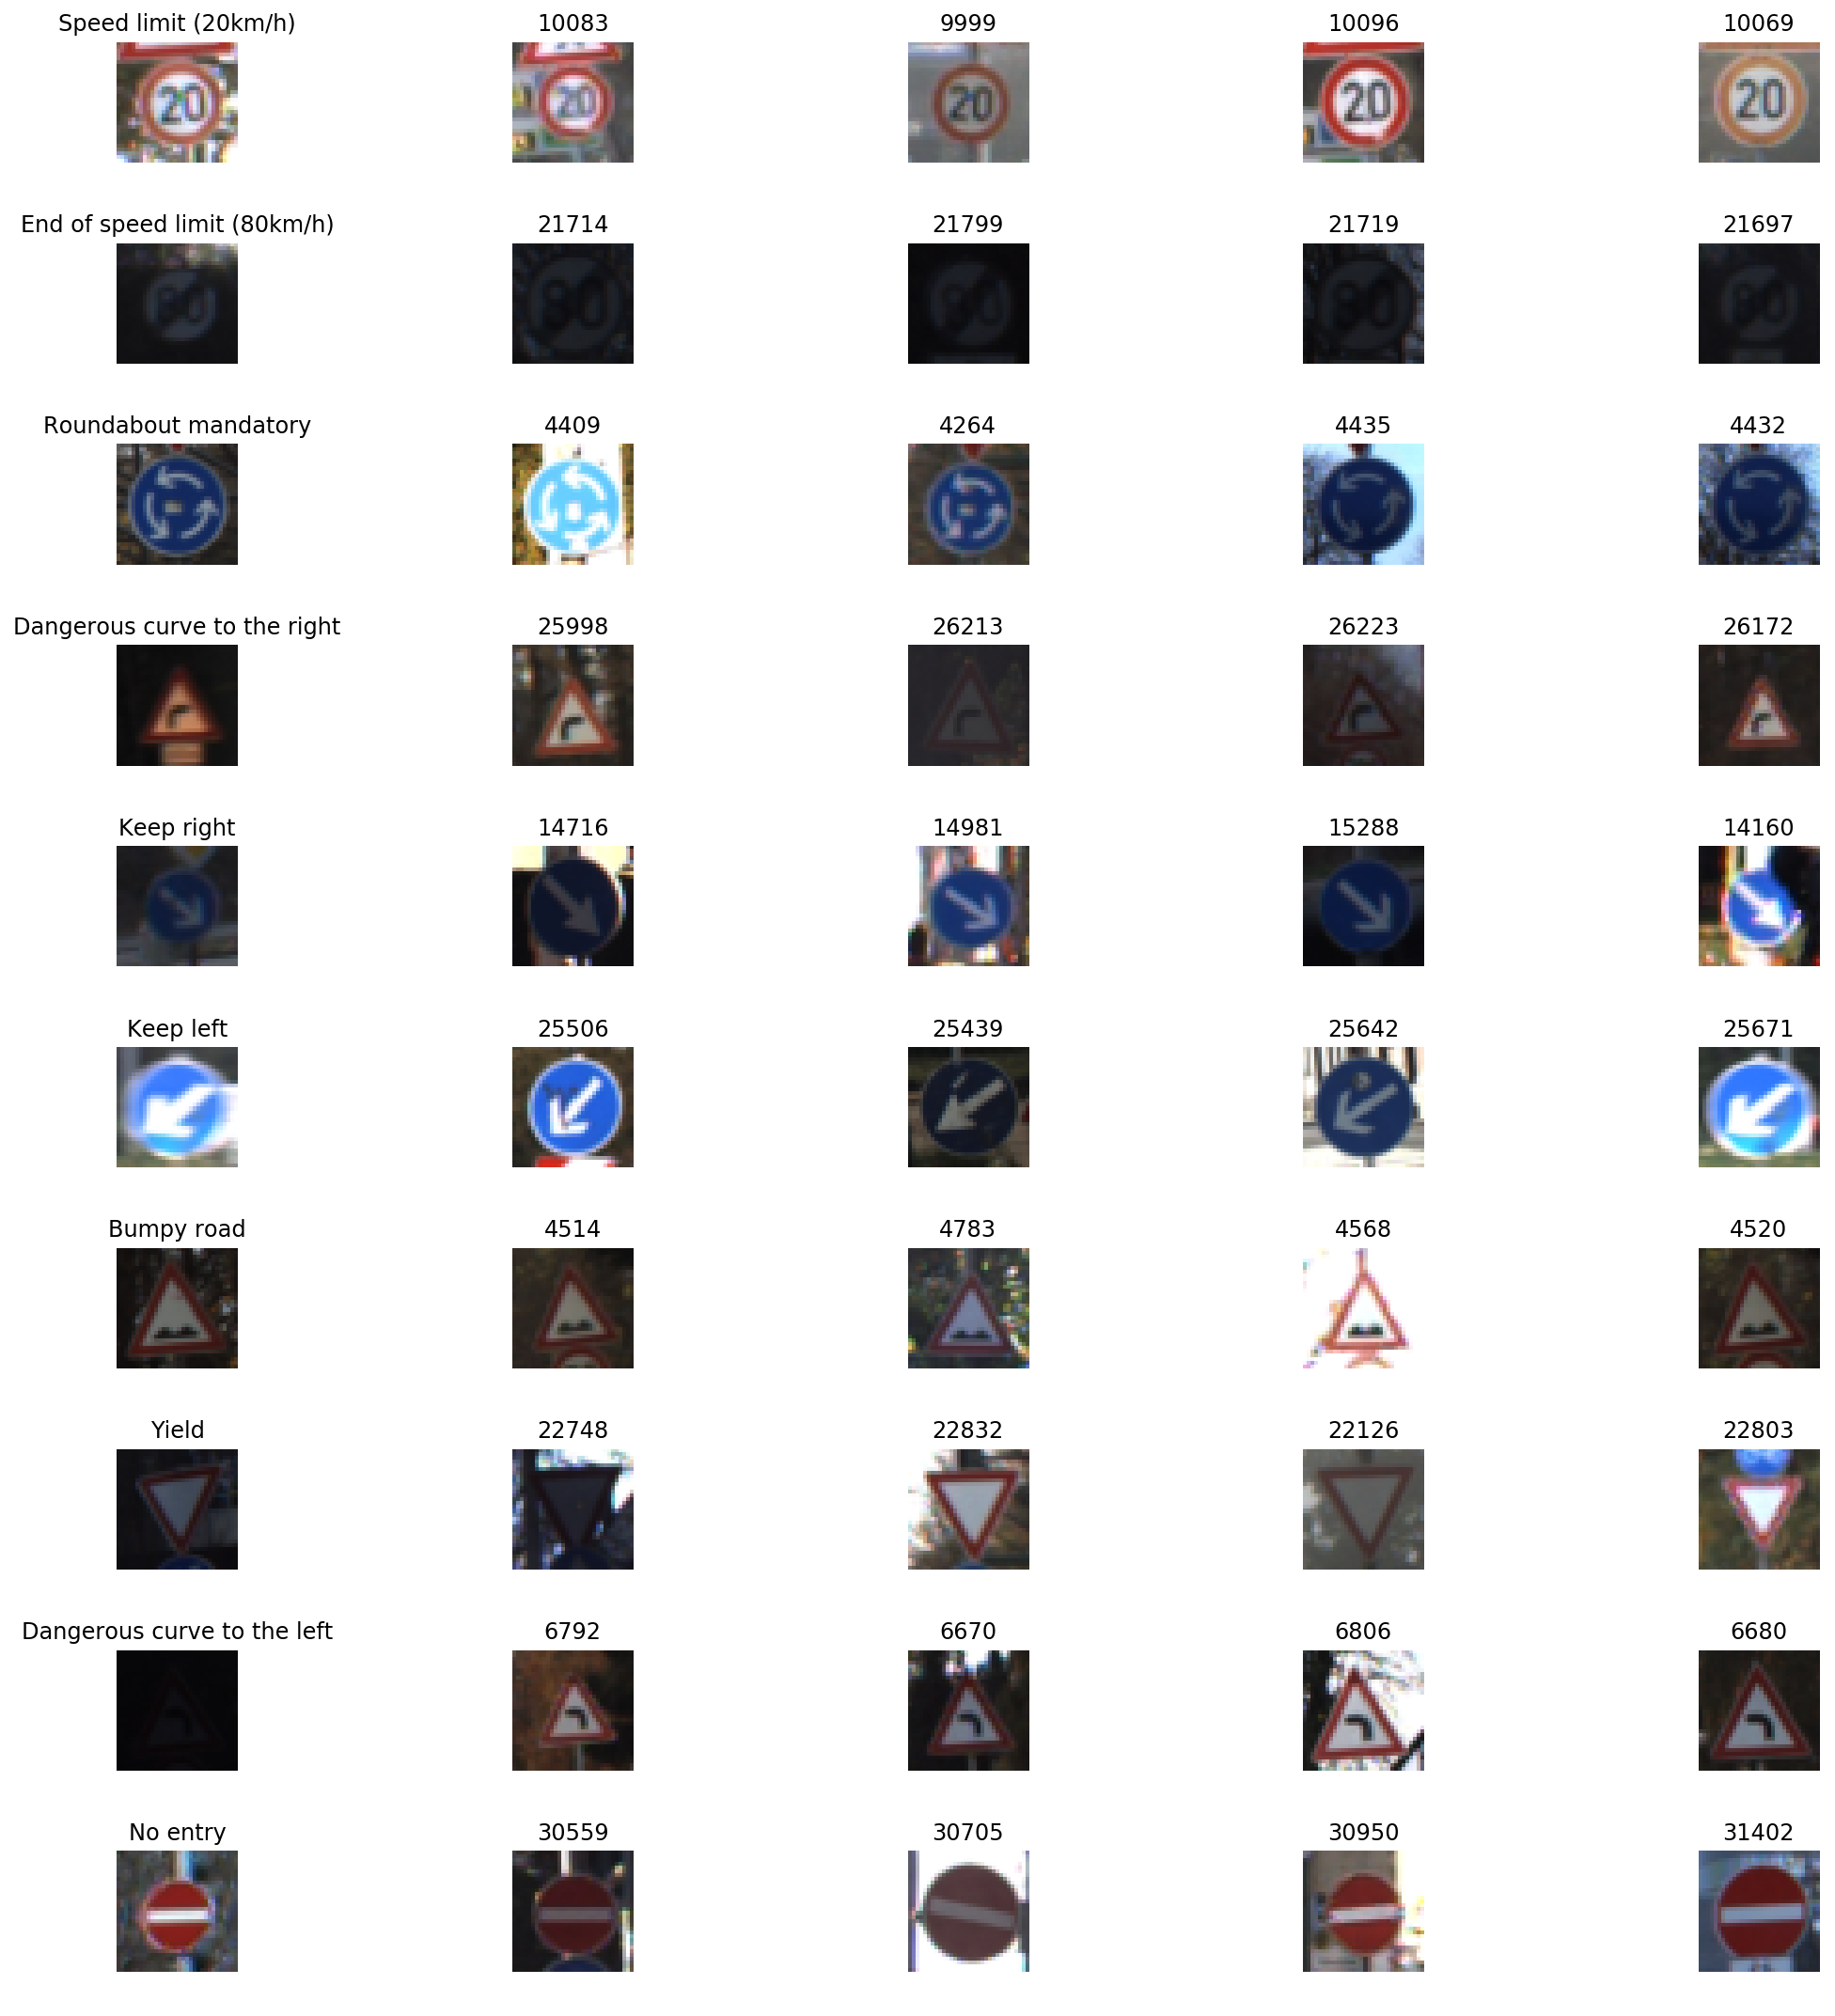

In [5]:
# Visualization of random 5 examples from 10 different classes
signsperclass = 5
classestoshow = 10
random_signs = []
display_figs = {}
display_labels = {}

n = 0
picidx = 0
for i in range(classestoshow):
    rand_class = random.randint(0, n_classes-1)
    rand_pic = random.randint(rand_class*min_train_count, (rand_class*min_train_count)+min_train_count-signsperclass)
    for j in range(signsperclass):
        picidx = rand_pic+j
        index= indexing_arr_int[picidx]
        if(j == 0):
            display_labels[n] = signs[y_train[index]]
        else:
            display_labels[n] = index
        display_figs[n] = X_train[index].squeeze()
        random_signs.append(index)
        n = n+1

# print(random_signs)
plot_figures(display_figs, classestoshow, signsperclass, display_labels)

31 - Wild animals crossing


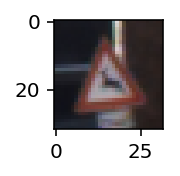

In [6]:
#Show one random example
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index],"-",signs[y_train[index]])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt

print (X_train.shape)
#Converting to grayscale
G_X_train = (np.sum(X_train/3, axis=3, keepdims=True))
G_X_valid = (np.sum(X_valid/3, axis=3, keepdims=True))
G_X_test =  (np.sum(X_test /3, axis=3, keepdims=True))

print (G_X_train.shape)

(34799, 32, 32, 3)
(34799, 32, 32, 1)


In [8]:
#Balanced training set
Balanced_X_train = G_X_train[indexing_arr_int]
Balanced_y_train = y_train[indexing_arr_int]

#Augmented training set
Aug_X_orig = []
Aug_X_train = []
Aug_y_train = []

i=0
#http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf
#Samples are randomly perturbed in position ([-2,2] pixels), in scale ([.9,1.1] ratio) and rotation ([-15,+15] degrees)
for i in range(len(y_train_u)):
    # Check if less data than mean + (max-mean)/2
    add_class_occurances = med_train_count - y_train_counts[i]
    if add_class_occurances > 0:
        #Limiting augmented pics to 160 images per class to avoid kernel crashing due to memory limitation
        if(add_class_occurances>160):
            add_class_occurances = 160
        print("Adding ",add_class_occurances,"for class:",signs[y_train_u[i]])
        signs_in_class = np.where(y_train == i)
        for num in range(add_class_occurances):
            
            random_sign = G_X_train[signs_in_class][random.randint(0,len(signs_in_class) - 1)]
            Aug_X_orig.append(random_sign)
            
            random_shift = random.randint(-2,2)
            random_scale = 0.9 + (0.1 * random.randint(0,3))
            random_rotate = random.randint(-15,15)
            
            #Zoom changes size of the image
            #random_sign = ndimage.zoom(random_sign, random_scale, mode='reflect')
            
            random_sign = ndimage.shift(random_sign, random_shift, mode='reflect')
            random_sign = ndimage.rotate(random_sign, random_rotate, reshape=False)
            
            Aug_X_train.append(random_sign)
            Aug_y_train.append(y_train_u[i])

Aug_X_orig = np.array(Aug_X_orig)
Aug_X_train = np.array(Aug_X_train)
Aug_y_train = np.array(Aug_y_train)
print(Aug_X_orig.shape,Aug_X_train.shape)
print("Augmented training examples", len(Aug_y_train))

Adding  160 for class: Speed limit (20km/h)
Adding  160 for class: End of speed limit (80km/h)
Adding  119 for class: Stop
Adding  160 for class: No vehicles
Adding  160 for class: Vehicles over 3.5 metric tons prohibited
Adding  160 for class: Dangerous curve to the left
Adding  160 for class: Dangerous curve to the right
Adding  160 for class: Double curve
Adding  160 for class: Bumpy road
Adding  160 for class: Slippery road
Adding  160 for class: Road narrows on the right
Adding  160 for class: Traffic signals
Adding  160 for class: Pedestrians
Adding  160 for class: Children crossing
Adding  160 for class: Bicycles crossing
Adding  160 for class: Beware of ice/snow
Adding  119 for class: Wild animals crossing
Adding  160 for class: End of all speed and passing limits
Adding  160 for class: Turn right ahead
Adding  160 for class: Turn left ahead
Adding  160 for class: Go straight or right
Adding  160 for class: Go straight or left
Adding  160 for class: Keep left
Adding  160 for cl

Augmented data-set random examples vs. originals on the right


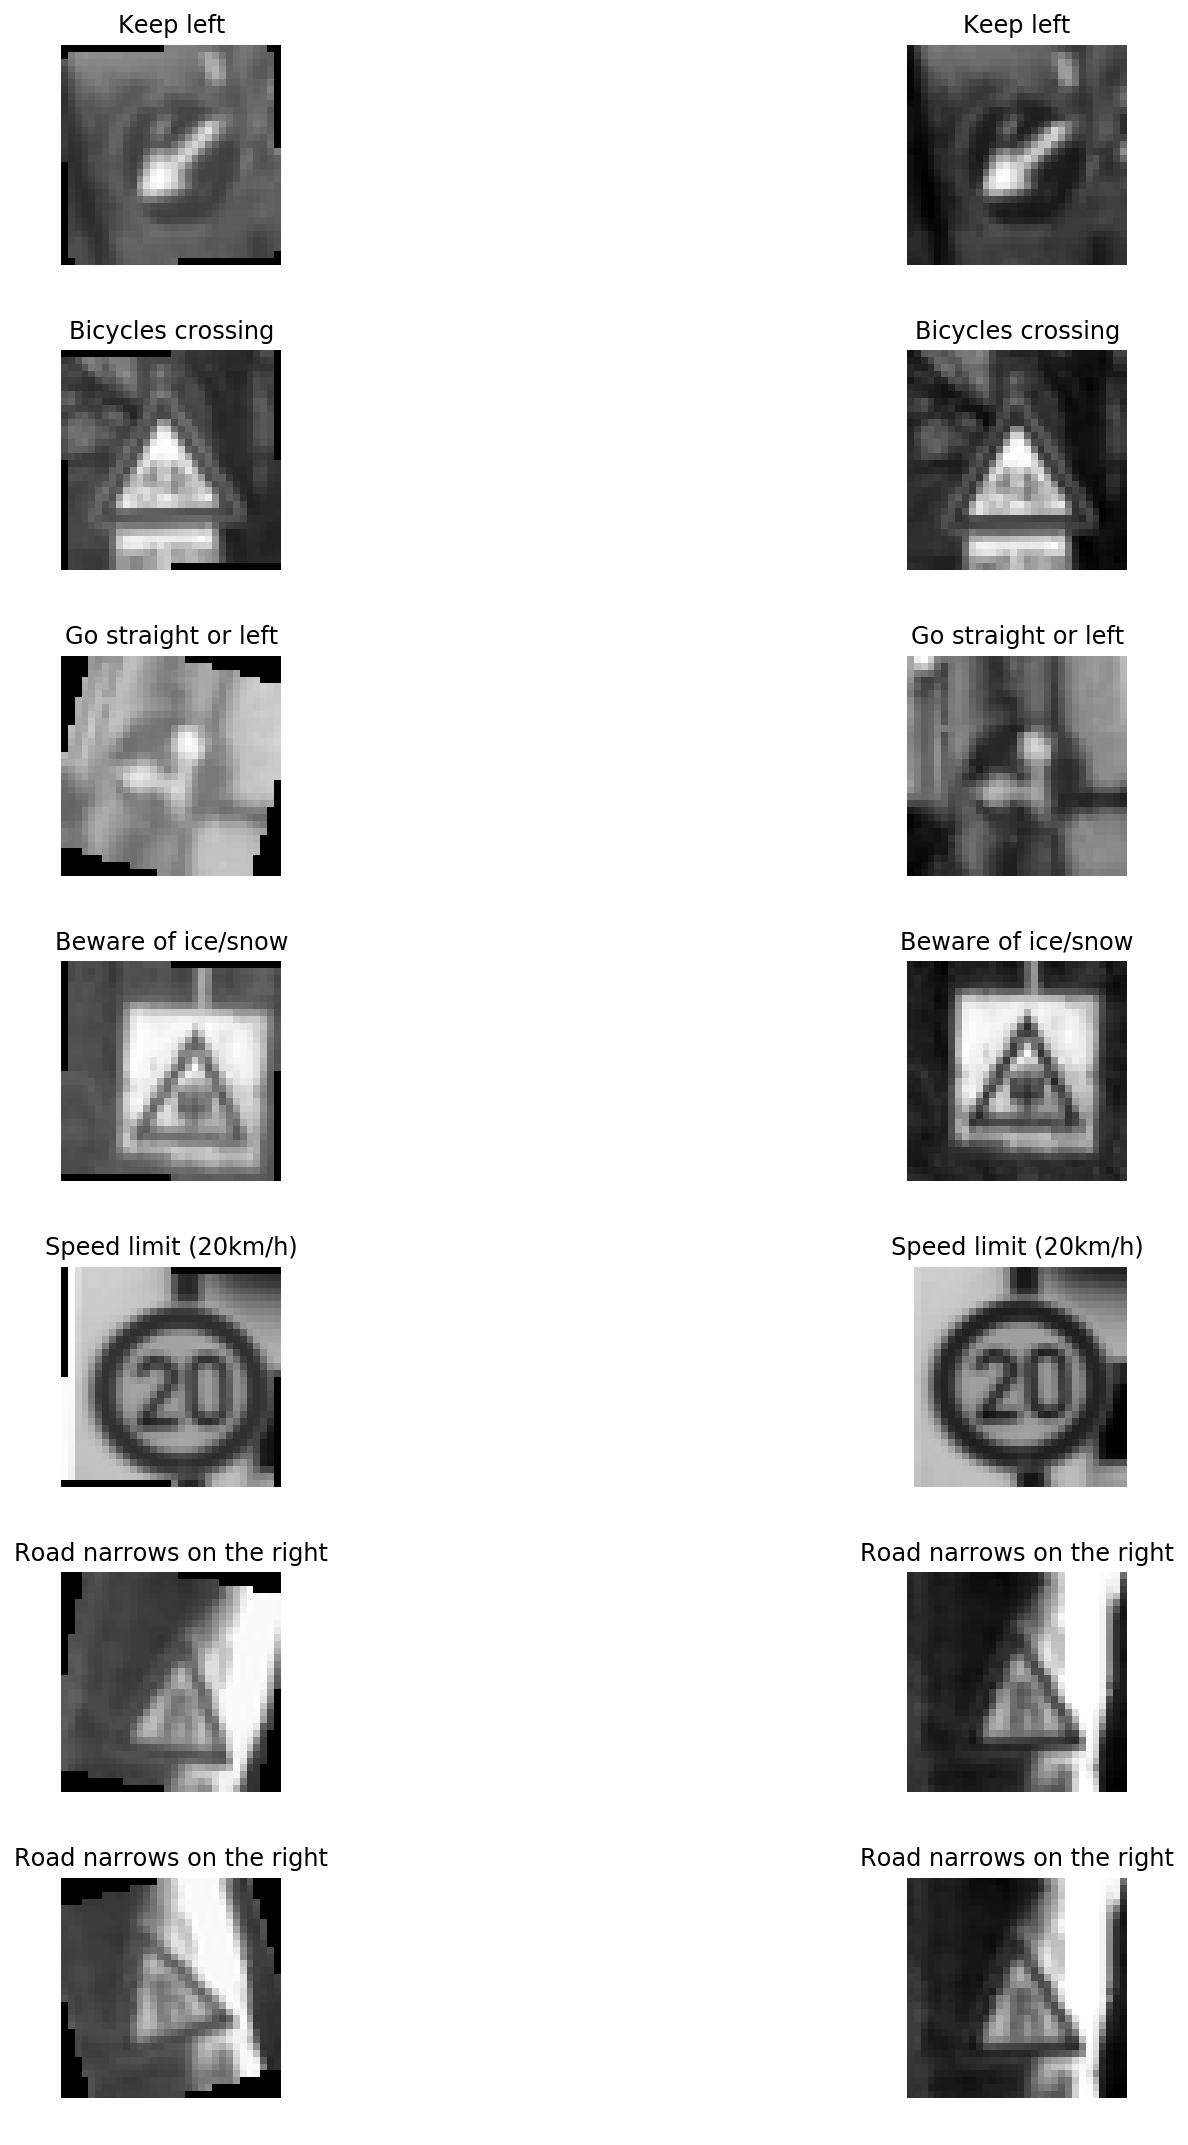

In [9]:
#Visualize examples of augmented image compared to original training image

display_figs = {}
display_labels = {}
picstoshow = 7
n = 0
i = 0

Aug_random_set = np.random.randint(len(Aug_y_train)-1,size=picstoshow).astype(int)
for randIdx in Aug_random_set:
    display_figs[n]   = Aug_X_train[randIdx].squeeze()
    display_figs[n+1] = Aug_X_orig[randIdx].squeeze()
    display_labels[n]   = signs[Aug_y_train[randIdx]]
    display_labels[n+1] = signs[Aug_y_train[randIdx]]
    n=n+2
print("Augmented data-set random examples vs. originals on the right")
plot_figures(display_figs, picstoshow, 2, display_labels)

In [10]:
#normalizing data to zero-centered range

#G_X_train = (G_X_train - 128) / 128
#G_X_valid = (G_X_valid - 128) / 128
#G_X_test =  (G_X_test  - 128) / 128
#Aug_X_train = (Aug_X_train  - 128) / 128
#Balanced_X_train = (Balanced_X_train - 128) / 128

### Model Architecture

#### Define your architecture here.
#### Feel free to use as many code cells as needed.

In [11]:
import tensorflow as tf

#TF model parameters

EPOCHS = 1000
BATCH_SIZE = 500


In [12]:
from tensorflow.contrib.layers import flatten

#Activations dictionary to be used for feature map visualization later
activations = {}

#Starting from LeNet model

def LeNet(x,drop_rate):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Max Pooling layer is added to reduce agressive details eleimination by Conv. layer
    m0 = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='VALID')
    m0 = tf.nn.relu(m0)
    
    # Layer 1: Convolutional
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 1, 8), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(8))
    conv1   = tf.nn.conv2d(m0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Layer 1: RelU Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Max Pooling Layer
    conv1mp = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 8, 24), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(24))
    conv2   = tf.nn.conv2d(conv1mp, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Layer2: Activation
    conv2 = tf.nn.relu(conv2)
    
    # Dropout is added to prevent overfitting
    conv2 = tf.nn.dropout(conv2, 1.0-(2.0*drop_rate))
    
    # Max Pooling again to prevent overfitting
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 3 Convolutional
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 24, 48), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(48))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
    # Flatten to enable connection to fully connected DNN
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, 1.0-(2.0*drop_rate))
    fc0   = flatten(conv3)
    
    # Layer 4: L1 Fully Connected
    fc1_W = tf.Variable(tf.truncated_normal(shape=(768, 420), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(420))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Layer 4: ReLU Activation
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, 1.0-(5.0*drop_rate))
    
    # Layer 5: L2 Fully Connected
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(420, 210), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(210))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Layer 5: L2 ReLU Activation
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, 1.0-(2.0*drop_rate))
    
    # Layer 6: Fully Connected Classification layer
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(210, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    activations[0]=m0
    activations[1]=conv1
    activations[2]=conv1mp
    activations[3]=conv2
    activations[4]=conv3
    
    return logits

In [13]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
drop_rate = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [14]:
#learning rate is set to relatively slow
rate = 0.0005

#Training setup (error calculation and adam optimizer)
logits = LeNet(x,drop_rate)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
#Accuracy evaluation logic

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(y_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #drop rate 0 results in dropout keep_prob of 1, this is really important to avoid getting crazy jumping predictions
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, drop_rate: 0.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [16]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
acccuracy_trend = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    
    print("Training...")
    print()
    i=0
    for i in range(int(EPOCHS)):
        #Augmented training set
        Aug_X_train, Aug_y_train = shuffle(Aug_X_train, Aug_y_train)
        
        for offset in range(0, len(Aug_y_train), BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = Aug_X_train[offset:end], Aug_y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, drop_rate:0.1})
        
        validation_accuracy = evaluate(G_X_valid, y_valid)
        acccuracy_trend.append(validation_accuracy)
        print("EPOCH {} phase-1 ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        #Balanced training set (subset of standard training set)
        Balanced_X_train, Balanced_y_train = shuffle(Balanced_X_train, Balanced_y_train)
        for offset in range(0, len(Balanced_y_train), BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = Balanced_X_train[offset:end], Balanced_y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, drop_rate:0.1})
        
        validation_accuracy = evaluate(G_X_valid, y_valid)
        acccuracy_trend.append(validation_accuracy)
        print("EPOCH {} phase-2 ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        #Standard training set
        G_X_train, y_train = shuffle(G_X_train, y_train)
        for offset in range(0, len(y_train), BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = G_X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, drop_rate:0.1})
        
        validation_accuracy = evaluate(G_X_valid, y_valid)
        acccuracy_trend.append(validation_accuracy)
        print("EPOCH {} phase-3 ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        if ((i>700) & (validation_accuracy > 0.95)):
            break
        
    saver.save(sess, './lenet_signs')
    print("Model saved")

Training...

EPOCH 1 phase-1 ...
Validation Accuracy = 0.014

EPOCH 1 phase-2 ...
Validation Accuracy = 0.029

EPOCH 1 phase-3 ...
Validation Accuracy = 0.200

EPOCH 2 phase-1 ...
Validation Accuracy = 0.208

EPOCH 2 phase-2 ...
Validation Accuracy = 0.222

EPOCH 2 phase-3 ...
Validation Accuracy = 0.388

EPOCH 3 phase-1 ...
Validation Accuracy = 0.390

EPOCH 3 phase-2 ...
Validation Accuracy = 0.432

EPOCH 3 phase-3 ...
Validation Accuracy = 0.520

EPOCH 4 phase-1 ...
Validation Accuracy = 0.544

EPOCH 4 phase-2 ...
Validation Accuracy = 0.518

EPOCH 4 phase-3 ...
Validation Accuracy = 0.608

EPOCH 5 phase-1 ...
Validation Accuracy = 0.594

EPOCH 5 phase-2 ...
Validation Accuracy = 0.585

EPOCH 5 phase-3 ...
Validation Accuracy = 0.681

EPOCH 6 phase-1 ...
Validation Accuracy = 0.634

EPOCH 6 phase-2 ...
Validation Accuracy = 0.645

EPOCH 6 phase-3 ...
Validation Accuracy = 0.715

EPOCH 7 phase-1 ...
Validation Accuracy = 0.678

EPOCH 7 phase-2 ...
Validation Accuracy = 0.689

EPOCH 7

EPOCH 56 phase-1 ...
Validation Accuracy = 0.928

EPOCH 56 phase-2 ...
Validation Accuracy = 0.929

EPOCH 56 phase-3 ...
Validation Accuracy = 0.932

EPOCH 57 phase-1 ...
Validation Accuracy = 0.924

EPOCH 57 phase-2 ...
Validation Accuracy = 0.933

EPOCH 57 phase-3 ...
Validation Accuracy = 0.931

EPOCH 58 phase-1 ...
Validation Accuracy = 0.930

EPOCH 58 phase-2 ...
Validation Accuracy = 0.930

EPOCH 58 phase-3 ...
Validation Accuracy = 0.933

EPOCH 59 phase-1 ...
Validation Accuracy = 0.930

EPOCH 59 phase-2 ...
Validation Accuracy = 0.931

EPOCH 59 phase-3 ...
Validation Accuracy = 0.933

EPOCH 60 phase-1 ...
Validation Accuracy = 0.929

EPOCH 60 phase-2 ...
Validation Accuracy = 0.934

EPOCH 60 phase-3 ...
Validation Accuracy = 0.929

EPOCH 61 phase-1 ...
Validation Accuracy = 0.925

EPOCH 61 phase-2 ...
Validation Accuracy = 0.921

EPOCH 61 phase-3 ...
Validation Accuracy = 0.928

EPOCH 62 phase-1 ...
Validation Accuracy = 0.930

EPOCH 62 phase-2 ...
Validation Accuracy = 0.931



EPOCH 110 phase-3 ...
Validation Accuracy = 0.950

EPOCH 111 phase-1 ...
Validation Accuracy = 0.946

EPOCH 111 phase-2 ...
Validation Accuracy = 0.947

EPOCH 111 phase-3 ...
Validation Accuracy = 0.947

EPOCH 112 phase-1 ...
Validation Accuracy = 0.946

EPOCH 112 phase-2 ...
Validation Accuracy = 0.946

EPOCH 112 phase-3 ...
Validation Accuracy = 0.944

EPOCH 113 phase-1 ...
Validation Accuracy = 0.939

EPOCH 113 phase-2 ...
Validation Accuracy = 0.947

EPOCH 113 phase-3 ...
Validation Accuracy = 0.949

EPOCH 114 phase-1 ...
Validation Accuracy = 0.945

EPOCH 114 phase-2 ...
Validation Accuracy = 0.951

EPOCH 114 phase-3 ...
Validation Accuracy = 0.943

EPOCH 115 phase-1 ...
Validation Accuracy = 0.948

EPOCH 115 phase-2 ...
Validation Accuracy = 0.942

EPOCH 115 phase-3 ...
Validation Accuracy = 0.945

EPOCH 116 phase-1 ...
Validation Accuracy = 0.943

EPOCH 116 phase-2 ...
Validation Accuracy = 0.944

EPOCH 116 phase-3 ...
Validation Accuracy = 0.947

EPOCH 117 phase-1 ...
Validatio

EPOCH 164 phase-2 ...
Validation Accuracy = 0.950

EPOCH 164 phase-3 ...
Validation Accuracy = 0.954

EPOCH 165 phase-1 ...
Validation Accuracy = 0.947

EPOCH 165 phase-2 ...
Validation Accuracy = 0.956

EPOCH 165 phase-3 ...
Validation Accuracy = 0.950

EPOCH 166 phase-1 ...
Validation Accuracy = 0.957

EPOCH 166 phase-2 ...
Validation Accuracy = 0.951

EPOCH 166 phase-3 ...
Validation Accuracy = 0.957

EPOCH 167 phase-1 ...
Validation Accuracy = 0.951

EPOCH 167 phase-2 ...
Validation Accuracy = 0.956

EPOCH 167 phase-3 ...
Validation Accuracy = 0.948

EPOCH 168 phase-1 ...
Validation Accuracy = 0.951

EPOCH 168 phase-2 ...
Validation Accuracy = 0.949

EPOCH 168 phase-3 ...
Validation Accuracy = 0.952

EPOCH 169 phase-1 ...
Validation Accuracy = 0.952

EPOCH 169 phase-2 ...
Validation Accuracy = 0.956

EPOCH 169 phase-3 ...
Validation Accuracy = 0.955

EPOCH 170 phase-1 ...
Validation Accuracy = 0.949

EPOCH 170 phase-2 ...
Validation Accuracy = 0.957

EPOCH 170 phase-3 ...
Validatio

EPOCH 218 phase-1 ...
Validation Accuracy = 0.954

EPOCH 218 phase-2 ...
Validation Accuracy = 0.961

EPOCH 218 phase-3 ...
Validation Accuracy = 0.951

EPOCH 219 phase-1 ...
Validation Accuracy = 0.958

EPOCH 219 phase-2 ...
Validation Accuracy = 0.954

EPOCH 219 phase-3 ...
Validation Accuracy = 0.959

EPOCH 220 phase-1 ...
Validation Accuracy = 0.958

EPOCH 220 phase-2 ...
Validation Accuracy = 0.960

EPOCH 220 phase-3 ...
Validation Accuracy = 0.954

EPOCH 221 phase-1 ...
Validation Accuracy = 0.946

EPOCH 221 phase-2 ...
Validation Accuracy = 0.954

EPOCH 221 phase-3 ...
Validation Accuracy = 0.954

EPOCH 222 phase-1 ...
Validation Accuracy = 0.955

EPOCH 222 phase-2 ...
Validation Accuracy = 0.956

EPOCH 222 phase-3 ...
Validation Accuracy = 0.956

EPOCH 223 phase-1 ...
Validation Accuracy = 0.957

EPOCH 223 phase-2 ...
Validation Accuracy = 0.956

EPOCH 223 phase-3 ...
Validation Accuracy = 0.953

EPOCH 224 phase-1 ...
Validation Accuracy = 0.957

EPOCH 224 phase-2 ...
Validatio

EPOCH 271 phase-3 ...
Validation Accuracy = 0.956

EPOCH 272 phase-1 ...
Validation Accuracy = 0.956

EPOCH 272 phase-2 ...
Validation Accuracy = 0.956

EPOCH 272 phase-3 ...
Validation Accuracy = 0.958

EPOCH 273 phase-1 ...
Validation Accuracy = 0.960

EPOCH 273 phase-2 ...
Validation Accuracy = 0.957

EPOCH 273 phase-3 ...
Validation Accuracy = 0.960

EPOCH 274 phase-1 ...
Validation Accuracy = 0.961

EPOCH 274 phase-2 ...
Validation Accuracy = 0.955

EPOCH 274 phase-3 ...
Validation Accuracy = 0.959

EPOCH 275 phase-1 ...
Validation Accuracy = 0.959

EPOCH 275 phase-2 ...
Validation Accuracy = 0.959

EPOCH 275 phase-3 ...
Validation Accuracy = 0.958

EPOCH 276 phase-1 ...
Validation Accuracy = 0.961

EPOCH 276 phase-2 ...
Validation Accuracy = 0.954

EPOCH 276 phase-3 ...
Validation Accuracy = 0.955

EPOCH 277 phase-1 ...
Validation Accuracy = 0.958

EPOCH 277 phase-2 ...
Validation Accuracy = 0.962

EPOCH 277 phase-3 ...
Validation Accuracy = 0.958

EPOCH 278 phase-1 ...
Validatio

EPOCH 325 phase-2 ...
Validation Accuracy = 0.955

EPOCH 325 phase-3 ...
Validation Accuracy = 0.959

EPOCH 326 phase-1 ...
Validation Accuracy = 0.957

EPOCH 326 phase-2 ...
Validation Accuracy = 0.960

EPOCH 326 phase-3 ...
Validation Accuracy = 0.958

EPOCH 327 phase-1 ...
Validation Accuracy = 0.959

EPOCH 327 phase-2 ...
Validation Accuracy = 0.959

EPOCH 327 phase-3 ...
Validation Accuracy = 0.959

EPOCH 328 phase-1 ...
Validation Accuracy = 0.961

EPOCH 328 phase-2 ...
Validation Accuracy = 0.959

EPOCH 328 phase-3 ...
Validation Accuracy = 0.964

EPOCH 329 phase-1 ...
Validation Accuracy = 0.963

EPOCH 329 phase-2 ...
Validation Accuracy = 0.959

EPOCH 329 phase-3 ...
Validation Accuracy = 0.957

EPOCH 330 phase-1 ...
Validation Accuracy = 0.963

EPOCH 330 phase-2 ...
Validation Accuracy = 0.961

EPOCH 330 phase-3 ...
Validation Accuracy = 0.964

EPOCH 331 phase-1 ...
Validation Accuracy = 0.960

EPOCH 331 phase-2 ...
Validation Accuracy = 0.957

EPOCH 331 phase-3 ...
Validatio

EPOCH 379 phase-1 ...
Validation Accuracy = 0.957

EPOCH 379 phase-2 ...
Validation Accuracy = 0.964

EPOCH 379 phase-3 ...
Validation Accuracy = 0.961

EPOCH 380 phase-1 ...
Validation Accuracy = 0.960

EPOCH 380 phase-2 ...
Validation Accuracy = 0.961

EPOCH 380 phase-3 ...
Validation Accuracy = 0.960

EPOCH 381 phase-1 ...
Validation Accuracy = 0.958

EPOCH 381 phase-2 ...
Validation Accuracy = 0.958

EPOCH 381 phase-3 ...
Validation Accuracy = 0.964

EPOCH 382 phase-1 ...
Validation Accuracy = 0.960

EPOCH 382 phase-2 ...
Validation Accuracy = 0.961

EPOCH 382 phase-3 ...
Validation Accuracy = 0.958

EPOCH 383 phase-1 ...
Validation Accuracy = 0.957

EPOCH 383 phase-2 ...
Validation Accuracy = 0.960

EPOCH 383 phase-3 ...
Validation Accuracy = 0.959

EPOCH 384 phase-1 ...
Validation Accuracy = 0.960

EPOCH 384 phase-2 ...
Validation Accuracy = 0.963

EPOCH 384 phase-3 ...
Validation Accuracy = 0.964

EPOCH 385 phase-1 ...
Validation Accuracy = 0.959

EPOCH 385 phase-2 ...
Validatio

EPOCH 432 phase-3 ...
Validation Accuracy = 0.959

EPOCH 433 phase-1 ...
Validation Accuracy = 0.954

EPOCH 433 phase-2 ...
Validation Accuracy = 0.955

EPOCH 433 phase-3 ...
Validation Accuracy = 0.962

EPOCH 434 phase-1 ...
Validation Accuracy = 0.958

EPOCH 434 phase-2 ...
Validation Accuracy = 0.962

EPOCH 434 phase-3 ...
Validation Accuracy = 0.967

EPOCH 435 phase-1 ...
Validation Accuracy = 0.961

EPOCH 435 phase-2 ...
Validation Accuracy = 0.962

EPOCH 435 phase-3 ...
Validation Accuracy = 0.961

EPOCH 436 phase-1 ...
Validation Accuracy = 0.962

EPOCH 436 phase-2 ...
Validation Accuracy = 0.959

EPOCH 436 phase-3 ...
Validation Accuracy = 0.963

EPOCH 437 phase-1 ...
Validation Accuracy = 0.963

EPOCH 437 phase-2 ...
Validation Accuracy = 0.964

EPOCH 437 phase-3 ...
Validation Accuracy = 0.961

EPOCH 438 phase-1 ...
Validation Accuracy = 0.959

EPOCH 438 phase-2 ...
Validation Accuracy = 0.961

EPOCH 438 phase-3 ...
Validation Accuracy = 0.964

EPOCH 439 phase-1 ...
Validatio

EPOCH 486 phase-2 ...
Validation Accuracy = 0.961

EPOCH 486 phase-3 ...
Validation Accuracy = 0.959

EPOCH 487 phase-1 ...
Validation Accuracy = 0.957

EPOCH 487 phase-2 ...
Validation Accuracy = 0.959

EPOCH 487 phase-3 ...
Validation Accuracy = 0.962

EPOCH 488 phase-1 ...
Validation Accuracy = 0.962

EPOCH 488 phase-2 ...
Validation Accuracy = 0.961

EPOCH 488 phase-3 ...
Validation Accuracy = 0.961

EPOCH 489 phase-1 ...
Validation Accuracy = 0.952

EPOCH 489 phase-2 ...
Validation Accuracy = 0.963

EPOCH 489 phase-3 ...
Validation Accuracy = 0.965

EPOCH 490 phase-1 ...
Validation Accuracy = 0.963

EPOCH 490 phase-2 ...
Validation Accuracy = 0.958

EPOCH 490 phase-3 ...
Validation Accuracy = 0.960

EPOCH 491 phase-1 ...
Validation Accuracy = 0.962

EPOCH 491 phase-2 ...
Validation Accuracy = 0.965

EPOCH 491 phase-3 ...
Validation Accuracy = 0.963

EPOCH 492 phase-1 ...
Validation Accuracy = 0.963

EPOCH 492 phase-2 ...
Validation Accuracy = 0.961

EPOCH 492 phase-3 ...
Validatio

EPOCH 540 phase-1 ...
Validation Accuracy = 0.961

EPOCH 540 phase-2 ...
Validation Accuracy = 0.961

EPOCH 540 phase-3 ...
Validation Accuracy = 0.961

EPOCH 541 phase-1 ...
Validation Accuracy = 0.959

EPOCH 541 phase-2 ...
Validation Accuracy = 0.961

EPOCH 541 phase-3 ...
Validation Accuracy = 0.963

EPOCH 542 phase-1 ...
Validation Accuracy = 0.960

EPOCH 542 phase-2 ...
Validation Accuracy = 0.962

EPOCH 542 phase-3 ...
Validation Accuracy = 0.959

EPOCH 543 phase-1 ...
Validation Accuracy = 0.958

EPOCH 543 phase-2 ...
Validation Accuracy = 0.956

EPOCH 543 phase-3 ...
Validation Accuracy = 0.960

EPOCH 544 phase-1 ...
Validation Accuracy = 0.960

EPOCH 544 phase-2 ...
Validation Accuracy = 0.961

EPOCH 544 phase-3 ...
Validation Accuracy = 0.960

EPOCH 545 phase-1 ...
Validation Accuracy = 0.962

EPOCH 545 phase-2 ...
Validation Accuracy = 0.964

EPOCH 545 phase-3 ...
Validation Accuracy = 0.960

EPOCH 546 phase-1 ...
Validation Accuracy = 0.955

EPOCH 546 phase-2 ...
Validatio

EPOCH 593 phase-3 ...
Validation Accuracy = 0.963

EPOCH 594 phase-1 ...
Validation Accuracy = 0.965

EPOCH 594 phase-2 ...
Validation Accuracy = 0.964

EPOCH 594 phase-3 ...
Validation Accuracy = 0.958

EPOCH 595 phase-1 ...
Validation Accuracy = 0.956

EPOCH 595 phase-2 ...
Validation Accuracy = 0.961

EPOCH 595 phase-3 ...
Validation Accuracy = 0.963

EPOCH 596 phase-1 ...
Validation Accuracy = 0.962

EPOCH 596 phase-2 ...
Validation Accuracy = 0.961

EPOCH 596 phase-3 ...
Validation Accuracy = 0.964

EPOCH 597 phase-1 ...
Validation Accuracy = 0.962

EPOCH 597 phase-2 ...
Validation Accuracy = 0.966

EPOCH 597 phase-3 ...
Validation Accuracy = 0.962

EPOCH 598 phase-1 ...
Validation Accuracy = 0.964

EPOCH 598 phase-2 ...
Validation Accuracy = 0.963

EPOCH 598 phase-3 ...
Validation Accuracy = 0.964

EPOCH 599 phase-1 ...
Validation Accuracy = 0.963

EPOCH 599 phase-2 ...
Validation Accuracy = 0.962

EPOCH 599 phase-3 ...
Validation Accuracy = 0.964

EPOCH 600 phase-1 ...
Validatio

EPOCH 647 phase-2 ...
Validation Accuracy = 0.968

EPOCH 647 phase-3 ...
Validation Accuracy = 0.966

EPOCH 648 phase-1 ...
Validation Accuracy = 0.965

EPOCH 648 phase-2 ...
Validation Accuracy = 0.961

EPOCH 648 phase-3 ...
Validation Accuracy = 0.964

EPOCH 649 phase-1 ...
Validation Accuracy = 0.967

EPOCH 649 phase-2 ...
Validation Accuracy = 0.967

EPOCH 649 phase-3 ...
Validation Accuracy = 0.964

EPOCH 650 phase-1 ...
Validation Accuracy = 0.959

EPOCH 650 phase-2 ...
Validation Accuracy = 0.962

EPOCH 650 phase-3 ...
Validation Accuracy = 0.963

EPOCH 651 phase-1 ...
Validation Accuracy = 0.965

EPOCH 651 phase-2 ...
Validation Accuracy = 0.965

EPOCH 651 phase-3 ...
Validation Accuracy = 0.967

EPOCH 652 phase-1 ...
Validation Accuracy = 0.965

EPOCH 652 phase-2 ...
Validation Accuracy = 0.967

EPOCH 652 phase-3 ...
Validation Accuracy = 0.967

EPOCH 653 phase-1 ...
Validation Accuracy = 0.964

EPOCH 653 phase-2 ...
Validation Accuracy = 0.961

EPOCH 653 phase-3 ...
Validatio

EPOCH 701 phase-1 ...
Validation Accuracy = 0.966

EPOCH 701 phase-2 ...
Validation Accuracy = 0.967

EPOCH 701 phase-3 ...
Validation Accuracy = 0.960

EPOCH 702 phase-1 ...
Validation Accuracy = 0.962

EPOCH 702 phase-2 ...
Validation Accuracy = 0.963

EPOCH 702 phase-3 ...
Validation Accuracy = 0.961

Model saved


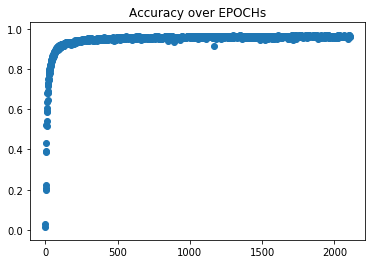

In [17]:
#Visualize learning rate over EPOCH phases
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.scatter(np.arange(len(acccuracy_trend)),acccuracy_trend)
plt.title('Accuracy over EPOCHs')


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

31 - Wild animals crossing


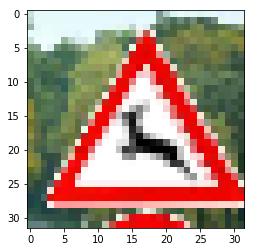

27 - Pedestrians


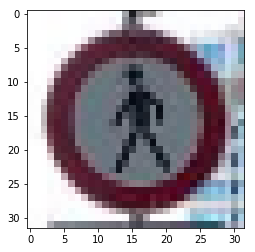

3 - Speed limit (60km/h)


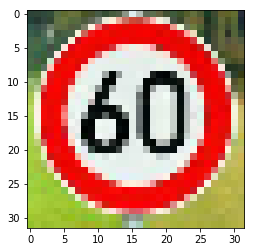

14 - Stop


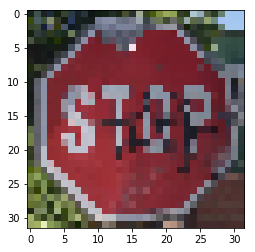

18 - General caution


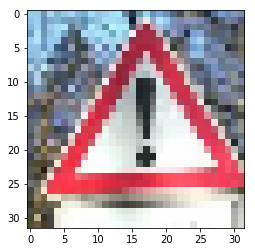

In [72]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg

X_test_images = []
y_test_images = []

for filename in os.listdir("testimgs32x32"):
    #Read bitmap 32x32 files
    if filename.endswith(".bmp"):
        image = mpimg.imread('testimgs32x32/'+filename)
        X_test_images.append(image)
        #Filenames include correct label number
        y_test_images.append(int(filename.split("_")[0]))
        print(y_test_images[-1],"-",signs[y_test_images[-1]])
        plt.imshow(image)
        plt.show()

X_test_images = np.array(X_test_images)
y_test_images = np.array(y_test_images)
G_X_test_images = (np.sum(X_test_images/3, axis=3, keepdims=True))

### Predict the Sign Type for Each Image

Test Accuracy = 0.800
TopKV2(values=array([[  9.72112298e-01,   2.78877206e-02,   1.72086703e-14,
          1.43978660e-14,   1.07545973e-15],
       [  4.34206456e-01,   2.36148641e-01,   9.37825590e-02,
          5.22144064e-02,   4.48318943e-02],
       [  6.59148335e-01,   1.51721537e-01,   1.48198739e-01,
          1.78632680e-02,   1.67728718e-02],
       [  9.99800384e-01,   1.00800316e-04,   4.32463130e-05,
          2.49430705e-05,   1.31075985e-05],
       [  9.99994636e-01,   5.38907125e-06,   2.13526874e-12,
          5.18246978e-14,   3.75211608e-14]], dtype=float32), indices=array([[31, 21, 19, 24, 11],
       [38,  1, 32, 15, 36],
       [ 3,  5, 10,  1, 37],
       [14,  1, 26, 11, 18],
       [18, 26, 22, 27, 38]], dtype=int32))
Prediction 1 probability 0.972 is Wild animals crossing 
Prediction 2 probability 0.028 is Double curve 
Prediction 3 probability 0.000 is Dangerous curve to the left 
Prediction 4 probability 0.000 is Road narrows on the right 
Prediction 5 pr

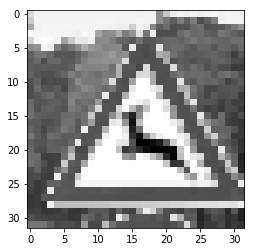

Prediction 1 probability 0.434 is Keep right 
Prediction 2 probability 0.236 is Speed limit (30km/h) 
Prediction 3 probability 0.094 is End of all speed and passing limits 
Prediction 4 probability 0.052 is No vehicles 
Prediction 5 probability 0.045 is Go straight or right 
Correct: Pedestrians


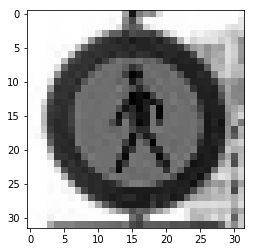

Prediction 1 probability 0.659 is Speed limit (60km/h) 
Prediction 2 probability 0.152 is Speed limit (80km/h) 
Prediction 3 probability 0.148 is No passing for vehicles over 3.5 metric tons 
Prediction 4 probability 0.018 is Speed limit (30km/h) 
Prediction 5 probability 0.017 is Go straight or left 
Correct: Speed limit (60km/h)


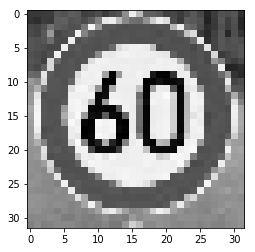

Prediction 1 probability 1.000 is Stop 
Prediction 2 probability 0.000 is Speed limit (30km/h) 
Prediction 3 probability 0.000 is Traffic signals 
Prediction 4 probability 0.000 is Right-of-way at the next intersection 
Prediction 5 probability 0.000 is General caution 
Correct: Stop


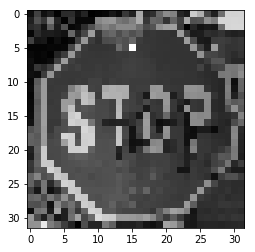

Prediction 1 probability 1.000 is General caution 
Prediction 2 probability 0.000 is Traffic signals 
Prediction 3 probability 0.000 is Bumpy road 
Prediction 4 probability 0.000 is Pedestrians 
Prediction 5 probability 0.000 is Keep right 
Correct: General caution


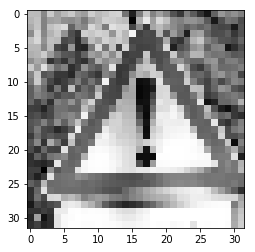

In [77]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

test_predictions = np.array([])

top_predictions = tf.nn.top_k(tf.nn.softmax(logits), k=5)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess = tf.get_default_session()
    
    test_predictions = sess.run(top_predictions, feed_dict={x: G_X_test_images, y: y_test_images, drop_rate:0.0})
    test_accuracy = evaluate(G_X_test_images, y_test_images)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print(test_predictions)

    for test_index in range(len(y_test_images)):
        top_guess=np.array(test_predictions.indices[test_index])
        percentages = test_predictions[0][test_index]
        for guessNo in range(len(percentages)):
            print("Prediction {:n} probability {:.3f} is {:s} ".format(guessNo+1,percentages[guessNo],signs[top_guess[guessNo]]))
        print("Correct:", signs[y_test_images[test_index]])
        plt.imshow(G_X_test_images[test_index].squeeze(), cmap="gray")
        plt.show()
    

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Prediction 1 probability 0.972 is Wild animals crossing 
Prediction 2 probability 0.028 is Double curve 
Prediction 3 probability 0.000 is Dangerous curve to the left 
Prediction 4 probability 0.000 is Road narrows on the right 
Prediction 5 probability 0.000 is Right-of-way at the next intersection 
Correct: Wild animals crossing


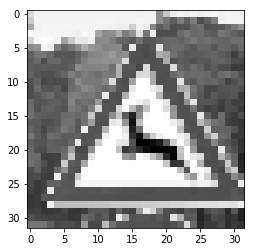

Prediction 1 probability 0.434 is Keep right 
Prediction 2 probability 0.236 is Speed limit (30km/h) 
Prediction 3 probability 0.094 is End of all speed and passing limits 
Prediction 4 probability 0.052 is No vehicles 
Prediction 5 probability 0.045 is Go straight or right 
Correct: Pedestrians


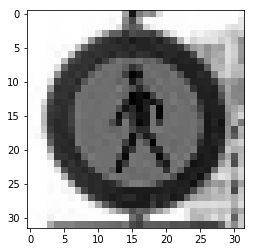

Prediction 1 probability 0.659 is Speed limit (60km/h) 
Prediction 2 probability 0.152 is Speed limit (80km/h) 
Prediction 3 probability 0.148 is No passing for vehicles over 3.5 metric tons 
Prediction 4 probability 0.018 is Speed limit (30km/h) 
Prediction 5 probability 0.017 is Go straight or left 
Correct: Speed limit (60km/h)


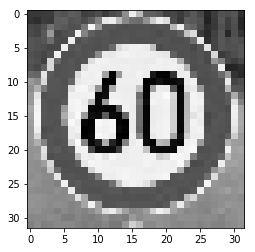

Prediction 1 probability 1.000 is Stop 
Prediction 2 probability 0.000 is Speed limit (30km/h) 
Prediction 3 probability 0.000 is Traffic signals 
Prediction 4 probability 0.000 is Right-of-way at the next intersection 
Prediction 5 probability 0.000 is General caution 
Correct: Stop


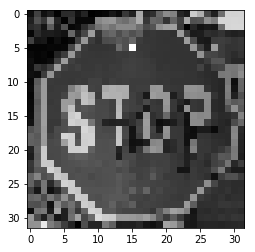

Prediction 1 probability 1.000 is General caution 
Prediction 2 probability 0.000 is Traffic signals 
Prediction 3 probability 0.000 is Bumpy road 
Prediction 4 probability 0.000 is Pedestrians 
Prediction 5 probability 0.000 is Keep right 
Correct: General caution


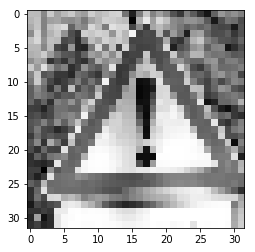

In [76]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

for test_index in range(len(y_test_images)):
    top_guess=np.array(test_predictions.indices[test_index])
    percentages = test_predictions[0][test_index]
    for guessNo in range(len(percentages)):
        print("Prediction {:n} probability {:.3f} is {:s} ".format(guessNo+1,percentages[guessNo],signs[top_guess[guessNo]]))
    print("Correct:", signs[y_test_images[test_index]])
    plt.imshow(G_X_test_images[test_index].squeeze(), cmap="gray")
    plt.show()

Learning Accuracy = 1.000
Validation Accuracy = 0.961
Test Accuracy = 0.939


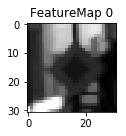

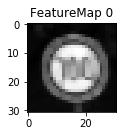

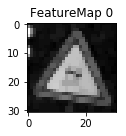

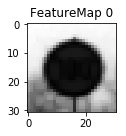

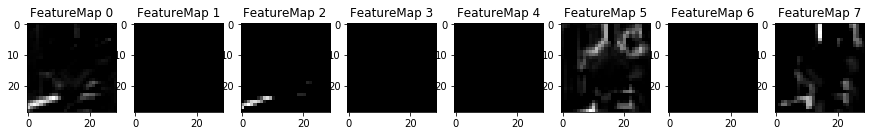

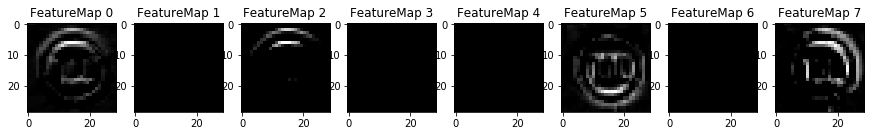

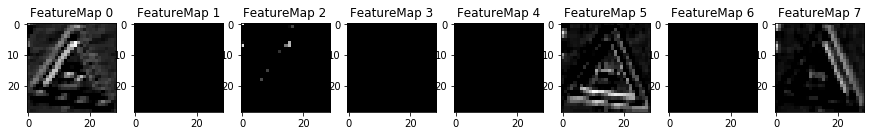

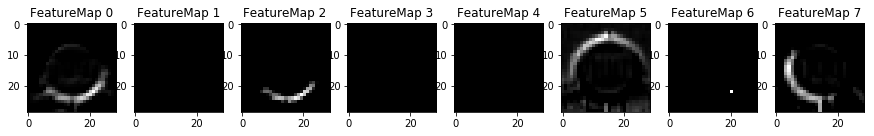

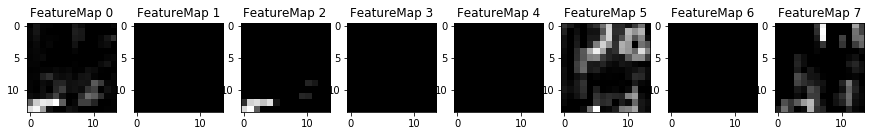

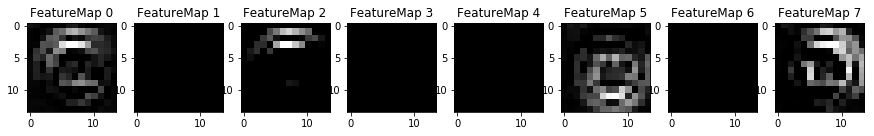

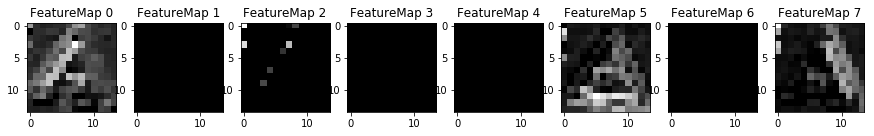

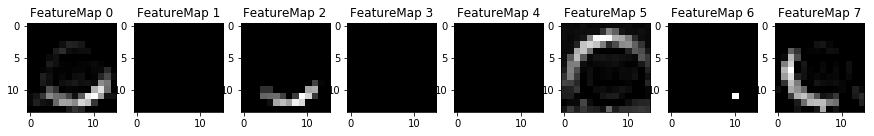

In [79]:
### Calculate the accuracy for test data set 

### Step 4 (Optional) Visualize network's state 
### params to Display feature maps for some images 
#No of test pics to visualize
show_test_pics = 4
#No of featuremap layers to visualize
show_layers = 3

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(G_X_train, y_train)
    print("Learning Accuracy = {:.3f}".format(test_accuracy))
    
    test_accuracy = evaluate(G_X_valid, y_valid)
    print("Validation Accuracy = {:.3f}".format(test_accuracy))
    
    test_accuracy = evaluate(G_X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    
    #enable visualization of layer No 1 to "showlayers"
    for i in range(show_layers):
        #show layer for few images
        for j in range(show_test_pics):
            #start from index 10 (just a random number)
            outputFeatureMap(G_X_test[j+10:j+11],activations[i],plt_num=(i*4)+j+1)

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [28]:
# NOTE: DONE Earlier #
# Already done as part of accuracy evaluation for testing set.
print("Already done as part of accuracy evaluation for testing set.")
#########################################################################################

### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

Already done as part of accuracy evaluation for testing set.
